In [2]:
#!/Users/bimajenie/opt/anaconda3/bin/env python3
import pandas as pd
import cv2
from mlib import *
from Synthesizer import Synthesizer
import rasterio as rio
import numpy as np


In [3]:
camera_df = pd.read_pickle('camera_df.pkl')
normalized_df = pd.read_pickle('normalized_df.pkl')

CONFIG = {
    'start_wavelength':300,
    'end_wavelength':3000,
    'start_threshold':50,
    'end_threshold':500,
    'ignore_limits':True
}

synth = Synthesizer(camera_df, config =  CONFIG)
normal_synth = Synthesizer(normalized_df, config =  CONFIG)

config: {'start_wavelength': 300, 'end_wavelength': 3000, 'start_threshold': 50, 'end_threshold': 500, 'ignore_limits': True}
config: {'start_wavelength': 300, 'end_wavelength': 3000, 'start_threshold': 50, 'end_threshold': 500, 'ignore_limits': True}


In [4]:
synth.generate_random_files(100, selection_pickle='success.pkl')
synth.generate_img_from_file(dim=(10,10), filename='comparison1-s.tiff')

Generating...
Reshaping...
self.files_array shape:  (100,)
Reshaping Done
self.files_array shape:  (10, 10)
Image array shape: (10, 10, 13)
Saving to comparison1-s.tiff...


In [5]:
normal_synth.generate_random_files(100, selection_pickle='success.pkl')
normal_synth.generate_img_from_file(dim=(10,10), filename='comparison2-n.tiff')

Generating...
Reshaping...
self.files_array shape:  (100,)
Reshaping Done
self.files_array shape:  (10, 10)
Image array shape: (10, 10, 13)
Saving to comparison2-n.tiff...


In [6]:
normal_synth.img_arr.shape

(10, 10, 13)

<Figure size 432x288 with 0 Axes>

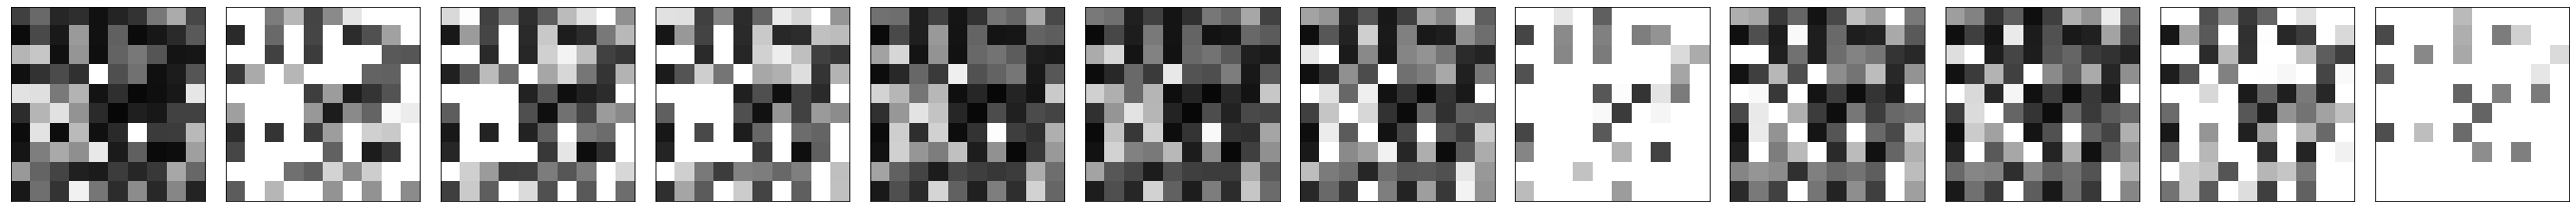

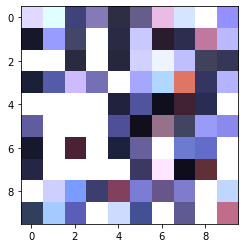

In [15]:
fn = r'comparison1-s.tiff'

smp = rio.open(fn).read()

bands=[]
for i in range(12):
    bands.append(mcv.imshow(smp, multiply=100, channel_first=True, bands=i, ret=True, show=False))
    
mcv.batch_show(bands)
mcv.imshow(smp, multiply=100, channel_first=True)


float64


<Figure size 432x288 with 0 Axes>

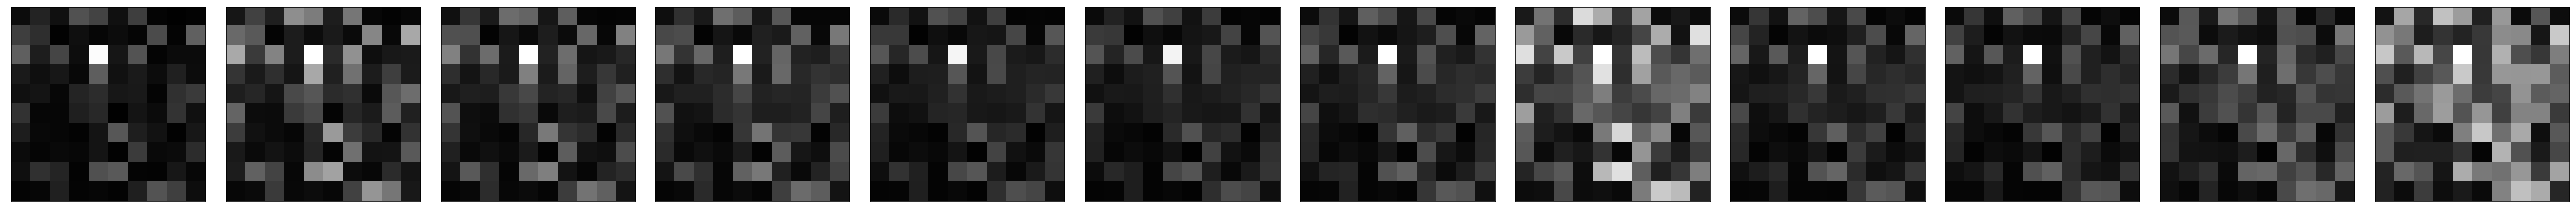

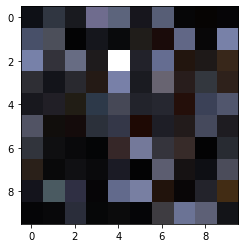

In [16]:
fn = r'comparison2-n.tiff'

smp = rio.open(fn).read()
print(smp.dtype)
bands=[]
for i in range(12):
    bands.append(mcv.imshow(smp, multiply=50, channel_first=True, bands=i, ret=True, show=False))
    
mcv.batch_show(bands)
mcv.imshow(smp, multiply=50, channel_first=True)


/Users/bimajenie/opt/anaconda3/envs/env_pytorch/lib/python3.6/site-packages/rasterio/__init__.py:207: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


<Figure size 432x288 with 0 Axes>

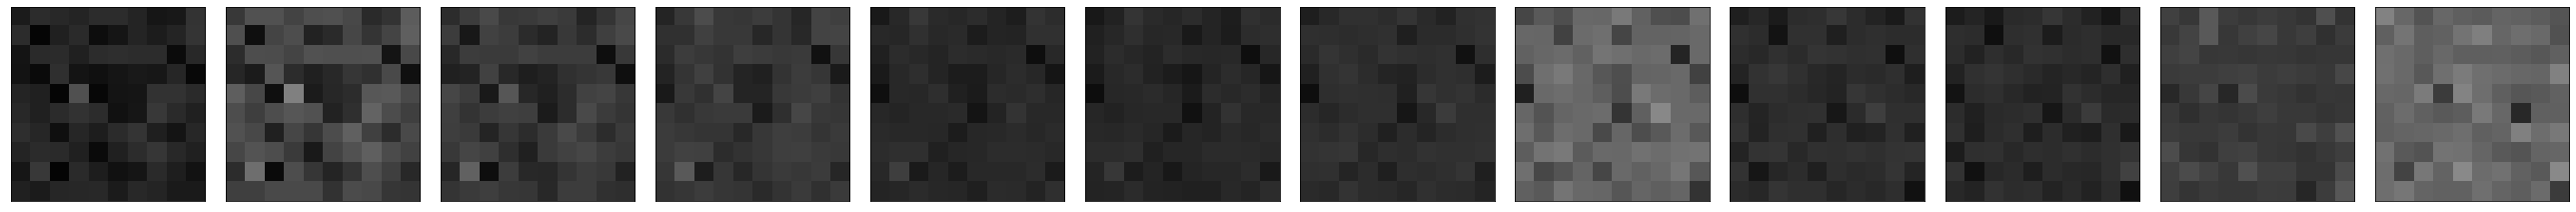

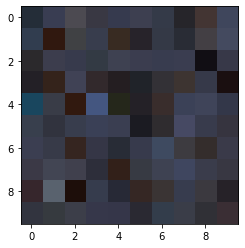

In [8]:
fn = r'comparison2-n.tiff'

smp = rio.open(fn).read()

bands=[]
for i in range(12):
    bands.append(mcv.imshow(smp, multiply=1, channel_first=True, bands=i, ret=True, show=False))
    
mcv.batch_show(bands)
mcv.imshow(smp, multiply=1, channel_first=True)


In [13]:
rgb_df = pd.read_pickle('rgb_df.pkl')
rgb = Synthesizer(rgb_df)


config: {'start_wavelength': 300, 'end_wavelength': 3000, 'start_threshold': 50, 'end_threshold': 500, 'ignore_limits': False}


In [19]:
rgb.generate_random_files(25, selection_pickle='success.pkl')
rgb.generate_img_from_file(dim=(5,5), filename='test_rgb3.tiff')

Generating...
Reshaping...
self.files_array shape:  (25,)
Reshaping Done
self.files_array shape:  (5, 5)
Image array shape: (5, 5, 3)
Saving to test_rgb3.tiff...


/Users/bimajenie/opt/anaconda3/envs/env_pytorch/lib/python3.6/site-packages/rasterio/__init__.py:207: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


<Figure size 432x288 with 0 Axes>

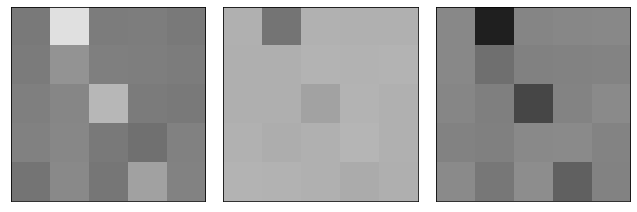

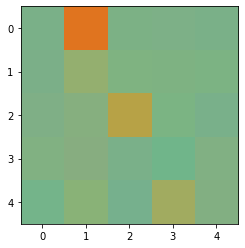

In [4]:

fn = 'test_rgb2.tiff'

smp = rio.open(fn).read()
bands=[]
for i in range(3):
    bands.append(mcv.imshow(smp, multiply=1, channel_first=True, bands=i, ret=True, show=False))
mcv.batch_show(bands)
mcv.imshow(smp, multiply=1, channel_first=True)
